In [1]:
import numpy as np
from grakel.datasets import fetch_dataset
from grakel.kernels import WeisfeilerLehman, VertexHistogram
from grakel.kernels import SubgraphMatching, GraphletSampling, ShortestPath, RandomWalk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataname = 'ENZYMES'

print(f'Fetching {dataname} dataset...')
data = fetch_dataset(dataname.upper(), verbose=False, prefer_attr_nodes=False)
print(f'Finish fetching!')
G, y = data.data, data.target

Fetching ENZYMES dataset...
Finish fetching!


In [3]:
from sklearn.model_selection import train_test_split
G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=0.2, random_state=42)

In [5]:
np.unique(y_train)

array([1, 2, 3, 4, 5, 6])

In [6]:
G_train_adj = np.row_stack([np.array(G_train)[np.where(y_train == num)[0].astype(np.uint64)] for num in np.unique(y_train)])

G_test_adj = np.row_stack([np.array(G_test)[np.where(y_test == num)[0].astype(np.uint64)] for num in np.unique(y_test)])

In [26]:
y_train_adj = np.concatenate([y_train[np.argwhere(y_train == num).ravel()] for num in np.unique(y_train)])
y_test_adj = np.concatenate([y_test[np.argwhere(y_test == num).ravel()]  for num in np.unique(y_train)])

In [9]:
[len(np.where(y_train == num)[0]) for num in np.unique(y_train)], len(G_train_adj), [len(np.where(y_test == num)[0]) for num in np.unique(y_test)], len(G_test_adj)

([81, 83, 83, 76, 80, 77], 480, [19, 17, 17, 24, 20, 23], 120)

In [10]:
def get_WL(G, G_test, iter_num = 1):
    wl_kernel = WeisfeilerLehman(n_iter=iter_num, normalize=True, base_graph_kernel=VertexHistogram)
    K = wl_kernel.fit_transform(G)
    K_test = wl_kernel.transform(G_test)
    # plt.figure(figsize=(14,12))
    # sns.heatmap(K)
    plt.figure(1, (10, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(K)
    plt.title(f'WL-{iter_num} train')

    plt.subplot(1, 2, 2)
    sns.heatmap(K_test)
    plt.title(f'WL-{iter_num} test')
    plt.show()

    return K, K_test

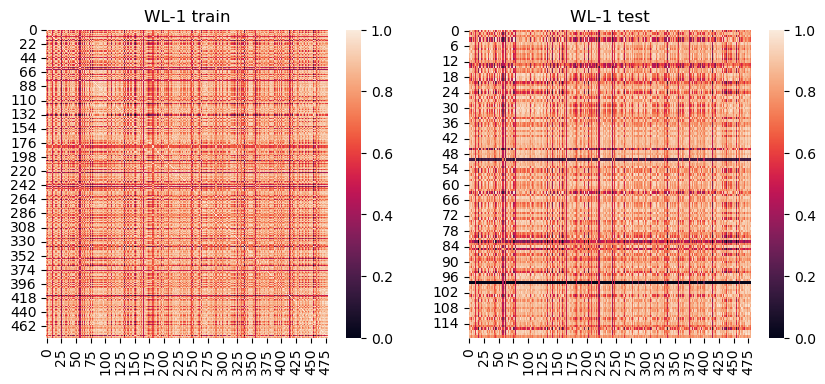

In [11]:
K_WL_1, K_WL_1_test = get_WL(G_train_adj, G_test_adj, 1)

In [14]:
u, s, vh = np.linalg.svd(K_WL_1, full_matrices=False)
min(s), max(s)

(4.4102730482755696e-14, 1124.9483164149653)

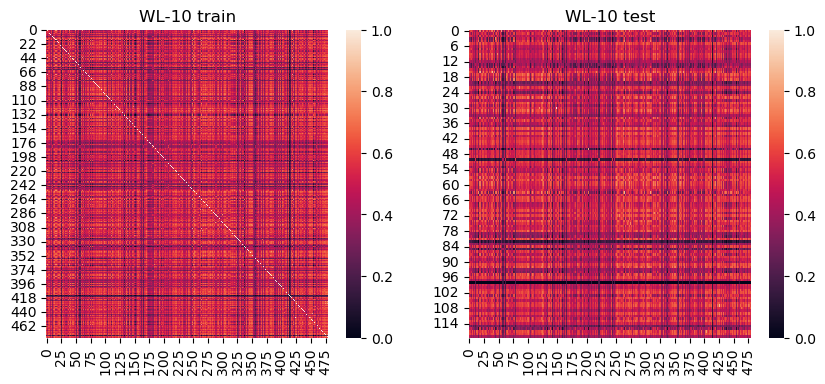

In [12]:
K_WL_10, K_WL_10_test = get_WL(G_train_adj, G_test_adj, 10)

In [17]:
u, s, vh = np.linalg.svd(K_WL_10, full_matrices=False)
min(s), max(s)

(2.1724285502681753e-16, 500.65213275872065)

In [13]:
def get_GS(G, G_test, k_num = 4):
    wl_kernel = GraphletSampling(normalize=True, k=k_num)
    K = wl_kernel.fit_transform(G)
    K_test = wl_kernel.transform(G_test)
    print('Done fitting')
    print('Start plotting')
    # plt.figure(figsize=(14,12))
    # sns.heatmap(K)
    plt.figure(1, (10, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(K)
    plt.title(f'GS-{k_num} train')

    plt.subplot(1, 2, 2)
    sns.heatmap(K_test)
    plt.title(f'GS-{k_num} test')
    plt.show()
    
    return K, K_test

/Users/mathilda/opt/anaconda3/lib/python3.9/site-packages/grakel/kernels/graphlet_sampling.py:324: RuntimeWarning: invalid value encountered in divide
  return np.divide(km, np.sqrt(np.outer(self._X_diag, self._X_diag)))
/Users/mathilda/opt/anaconda3/lib/python3.9/site-packages/grakel/kernels/graphlet_sampling.py:283: RuntimeWarning: invalid value encountered in divide
  km /= np.sqrt(np.outer(Y_diag, X_diag))


Done fitting
Start plotting


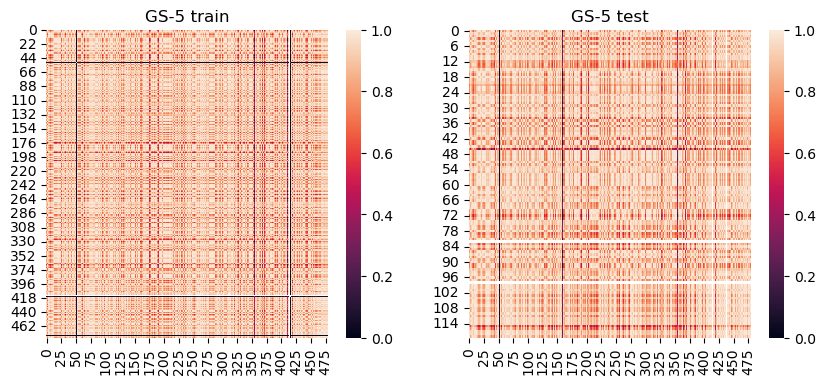

In [14]:
K_GS_5, K_GS_5_test = get_GS(G_train_adj, G_test_adj, 5)

/Users/mathilda/opt/anaconda3/lib/python3.9/site-packages/grakel/kernels/graphlet_sampling.py:324: RuntimeWarning: invalid value encountered in divide
  return np.divide(km, np.sqrt(np.outer(self._X_diag, self._X_diag)))
/Users/mathilda/opt/anaconda3/lib/python3.9/site-packages/grakel/kernels/graphlet_sampling.py:283: RuntimeWarning: invalid value encountered in divide
  km /= np.sqrt(np.outer(Y_diag, X_diag))


Done fitting
Start plotting


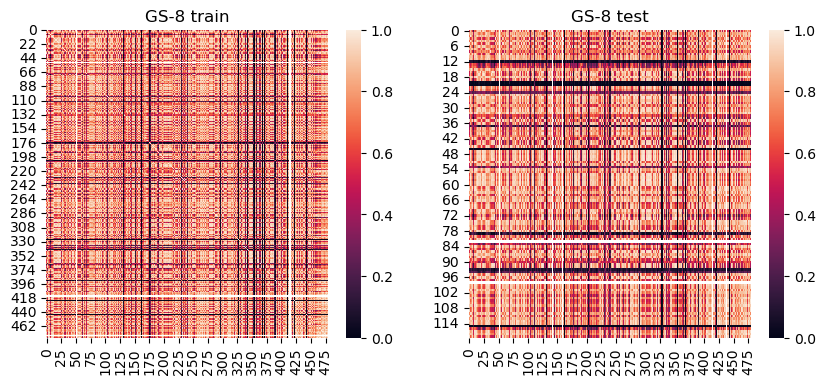

In [19]:
K_GS_8, K_GS_8_test = get_GS(G_train_adj, G_test_adj, 8)

In [15]:
def get_SP(G, G_test):
    wl_kernel = ShortestPath(normalize=True, algorithm_type="floyd_warshall")
    K = wl_kernel.fit_transform(G)
    K_test = wl_kernel.transform(G_test)
    print('Done fitting')
    print('Start plotting')
    # plt.figure(figsize=(14,12))
    # sns.heatmap(K)
    plt.figure(1, (10, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(K)
    plt.title(f'SP train')

    plt.subplot(1, 2, 2)
    sns.heatmap(K_test)
    plt.title(f'SP test')
    plt.show()
    
    return K, K_test

Done fitting
Start plotting


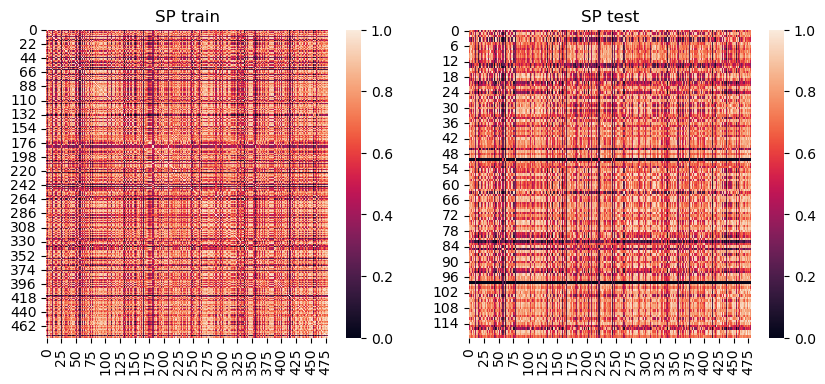

In [16]:
K_SP, K_SP_test = get_SP(G_train_adj, G_test_adj)

In [17]:
def get_RW(G, G_test, lambda_value = 0.1):
    wl_kernel = RandomWalk(lamda=lambda_value, normalize=True, kernel_type="exponential", 
                            n_jobs = 4, p = 100)
    K = wl_kernel.fit_transform(G)
    K_test = wl_kernel.transform(G_test)
    print('Done fitting')
    print('Start plotting')

    plt.figure(1, (10, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(K)
    plt.title(f'RW-{lambda_value} train')

    plt.subplot(1, 2, 2)
    sns.heatmap(K_test)
    plt.title(f'RW-{lambda_value} test')
    plt.show()
    
    return K, K_test

Done fitting
Start plotting


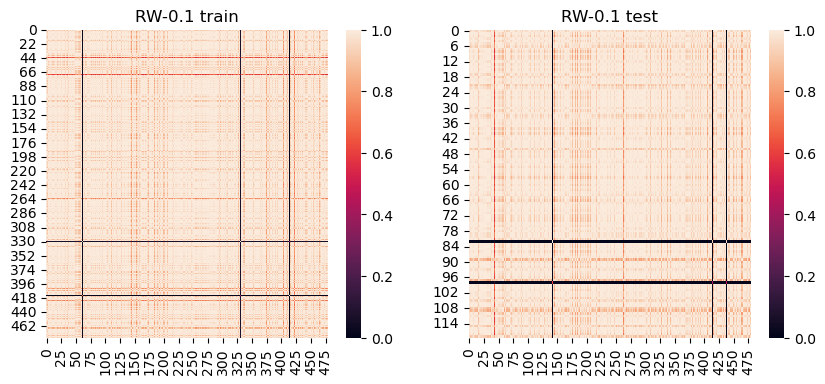

In [18]:
K_RW_01, K_RW_01_test = get_RW(G_train_adj, G_test_adj, 0.1)

Done fitting
Start plotting


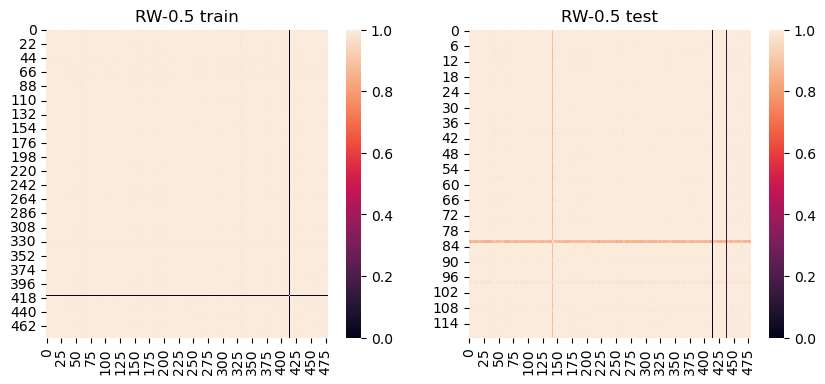

In [20]:
K_RW_05, K_RW_05_test = get_RW(G_train_adj, G_test_adj, 0.5)

In [21]:
from sklearn.svm import OneClassSVM, SVC
from sklearn.metrics import roc_auc_score, accuracy_score

In [23]:
def perform_SVC(K, K_test):
    # Uses the SVM classifier to perform classification
    clf = SVC(kernel="precomputed", tol=1e-6, probability = True)
    print('start fitting SVC...')
    clf.fit(K, y_train_adj)

    y_train_pred_proba = clf.predict_proba(K)
    y_train_pred = clf.classes_[np.argmax(y_train_pred_proba, axis = 1)]
    # print("Train:", y_train_pred)
    print("Test ACC: %.3f"%(accuracy_score(y_train_adj, y_train_pred)))

    y_test_pred_proba = clf.predict_proba(K_test)
    y_test_pred = clf.classes_[np.argmax(y_test_pred_proba, axis = 1)]
    # print("Test:",y_test_pred)
    print("Test ACC: %.3f"%(accuracy_score(y_test_adj, y_test_pred)))

In [33]:
# perform_SVC(K_RW_05, K_RW_05_test)

In [25]:
# perform_SVC(K_RW_01, K_RW_01_test)
y_test_adj

array([], dtype=int64)

In [27]:
perform_SVC(K_SP, K_SP_test)

start fitting SVC...
Test ACC: 0.421
Test ACC: 0.325


In [28]:
perform_SVC(np.nan_to_num(K_GS_8), np.nan_to_num(K_GS_8_test))

start fitting SVC...
Test ACC: 0.323
Test ACC: 0.300


In [29]:
perform_SVC(np.nan_to_num(K_GS_5), np.nan_to_num(K_GS_5_test))

start fitting SVC...
Test ACC: 0.206
Test ACC: 0.233


In [30]:
perform_SVC(K_WL_10, K_WL_10_test)

start fitting SVC...
Test ACC: 0.731
Test ACC: 0.317


In [31]:
perform_SVC(K_WL_1, K_WL_1_test)

start fitting SVC...
Test ACC: 0.365
Test ACC: 0.275


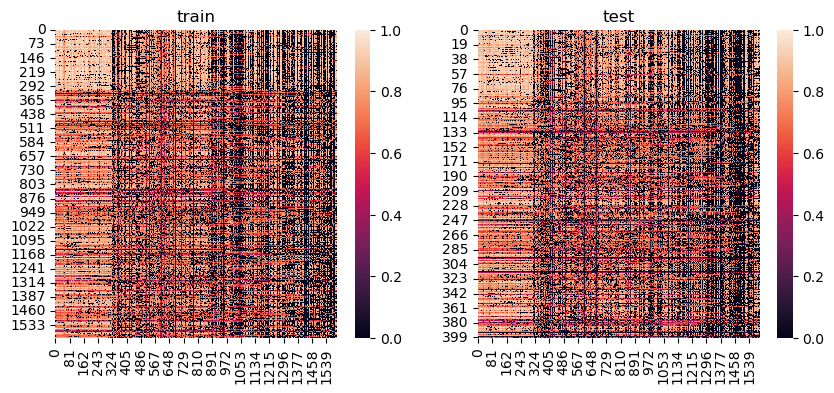

start fitting SVC...


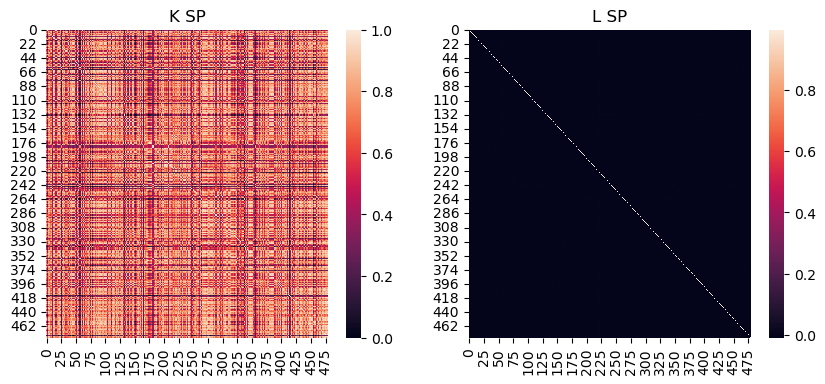

In [40]:
def get_laplacian(A):
    n, m = A.shape
    D = np.sum(A, axis = 0)**(-0.5)
    I = np.eye(n, m)
    return I - np.diag(D)@ A @ np.diag(D)

L_SP = get_laplacian(K_SP)

plt.figure(1, (10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(K_SP)
plt.title(f'K SP')

plt.subplot(1, 2, 2)
sns.heatmap(L_SP)
plt.title(f'L SP')
plt.show()

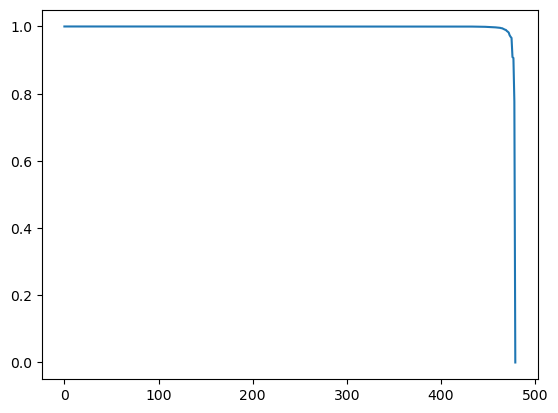

In [35]:
# K_SP, K_SP_test = get_SP(G_train_adj, G_test_adj)

u, s, vh = np.linalg.svd(L_SP, full_matrices=False)
plt.plot(s)
plt.show()

start fitting SVC...
Train: [0 1 0 ... 1 1 1]
Test ACC: 0.929
Test: [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1]
Test ACC: 0.907


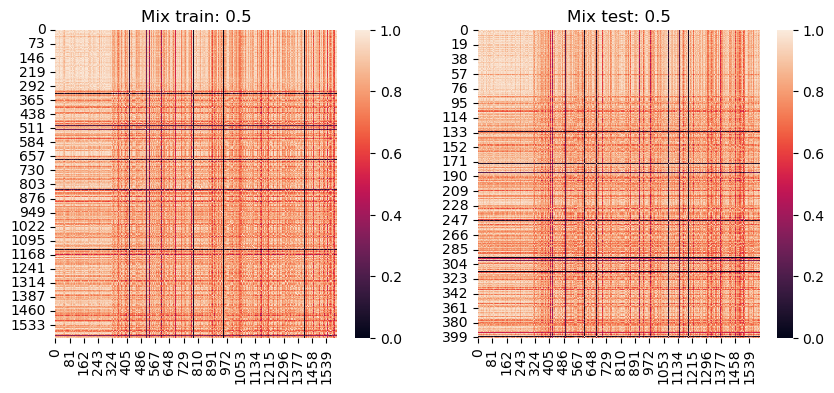

In [68]:
alpha = 0.5
# K_normalized = alpha * scaler.fit_transform(K_RW_001) + (1-alpha) * scaler.fit_transform(K_WL_10) 
K_normalized = alpha * K_WL_1 + (1-alpha) * np.nan_to_num(K_GS_5) #+ 0.5 * K_SP
K_normalized_test = alpha * K_WL_1_test + (1-alpha) * np.nan_to_num(K_GS_5_test) #+ 0.5 * K_SP_test
perform_SVC(K_normalized, K_normalized_test)

plt.figure(1, (10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(K_normalized)
plt.title(f'Mix train: {alpha}')
plt.subplot(1, 2, 2)
sns.heatmap(K_normalized_test)
plt.title(f'Mix test: {alpha}')
plt.show()

In [220]:
u, s, vh = np.linalg.svd(K_normalized, full_matrices=False)
min(s), max(s)

(8.224280245671012e-16, 35.21740615920297)